## <span style="color:blue">開啟影像檔與顯示影像</span>
下面示範用openCV的cv2.imread讀入影像與用cv2.imshow開啟視窗來顯示影像。<span style="color:red">使用cv2.imshow必須呼叫cv2.waitKey來處理視窗事件，否則不會顯示視窗。</span>

In [1]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
# import os
# print(os.path.abspath('..')) 
# ? '.': 當前目錄的絕對路徑 '..':上級目錄的絕對路徑
# another example: r"D:\python_workshop\pyhthon6\revise\函數.py"

url='https://tronclass.ntou.edu.tw:443/api/uploads/3206911/in-rich-content?created_at=2022-02-13T07:24:53Z'

src_file=tf.keras.utils.get_file(fname='highway',origin=url)
# tf.keras.utils.get_file(
#   fname = "在本地端的文件名稱",
#   origin = "要下載的數據集(Dataset)URL路徑",
#   
#   cache_dir = "要儲存的路徑", 
#   // 預設 :C:\Users\User\.keras\
#   
#   cache_subdir = "在要儲存的路徑下要儲存的dir名稱", 
#   // 檔案會存在此dir內 預設: datasets
#   
#   hash_algorithm = "md5" or "sha256" or 'auto', 
#   // 默認: auto 會自動檢測要用的hash算法，hash_algorithm 為檢查下載的資料是否有遺漏
#   
#   extract = True or False, 
#   // 是否嘗試解壓縮下載的文件
#   
#   archive_format = "auto" or "tar" or "zip" or "None",
#   // 解壓縮的檔案類型
# )

img = cv2.imread(src_file)
# if cv2.imread cannot find the image file, it returns None
# imread 可以傳入檔案位置開啟
# img 的 type 為 numpy.ndarray
# 為一個大陣列

if img is not None:
    # show this image by cv2.imshow
    cv2.imshow('image',img)    
    
    # call cv2.waitKey to process window messages
    cv2.waitKey()
    
    # destroy all windows
    cv2.destroyAllWindows()
else:
    print('image file is not found')

有時候，影像崁入notebook裡會更方便，這時就可以用matplotlib裡的plt.imshow。<span style="color:red">不過要注意，matplotlib的影像channel順序為RGB，但是openCV順序為BGR</span>。

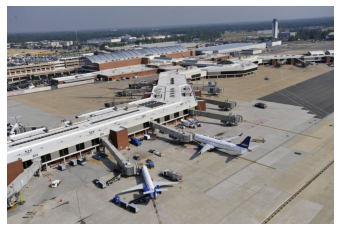

In [2]:
import cv2
import matplotlib.pyplot as plt
# %matplotlib inline

url='https://tronclass.ntou.edu.tw:443/api/uploads/3206875/in-rich-content?created_at=2022-02-13T07:24:49Z'
src_file=tf.keras.utils.get_file('airport',origin=url)
img = cv2.imread(src_file)
if img is not None:
    # show this image by plt.imshow
    # In plt.imshow, the order of the three channels is R, G, and B. 
    # In opencv, the order of the three channels is B, G, and R.
    plt.imshow(img[:,:,[2,1,0]])
    plt.axis('off')
else:
    print('image file is not found')

若要一並呈現好多張影像。可以使用subplot(row,column,figure_id)指令，表示共有row列,column行的sugplot裡第figure_index個subplot。

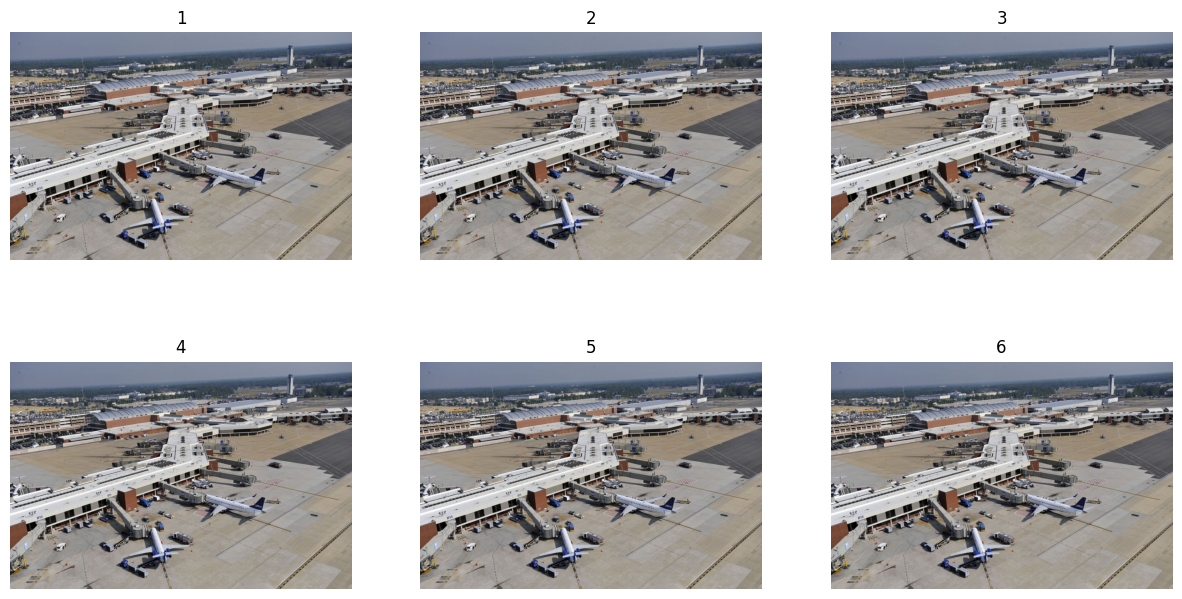

In [3]:
import cv2
import matplotlib.pyplot as plt
# %matplotlib inline

url='https://tronclass.ntou.edu.tw:443/api/uploads/3206875/in-rich-content?created_at=2022-02-13T07:24:49Z'
src_file=tf.keras.utils.get_file('airport',origin=url)
img = cv2.imread(src_file)
plt.figure(figsize=(15,8),dpi=100)
# .figure(
#   figsize = (wight, height),  // 寬高單位: inch 
#   dpi = (int),    
#       ! 1 inch 中有的點數。 更大的dpi就像放大鏡一樣。所有元素都通過鏡頭的放大倍數進行縮放
#       ! 像素 (即為畫面大小) = wight * dpi + height * dpi 
#           ? 如果以英寸為單位更改圖形大小，而 dpi 不變，較大的圖形仍具有相同的元素大小。
#           ? 因此，改變圖形尺寸就像拿一張不同尺寸的紙張一樣，這樣做當然不會改變用同一筆繪制的線條的寬度。
#           ? 更改dpi會縮放元素。在72 dpi時，1 寬度的線是 1 像素。在144 dpi時，這條線就是 2 像素。
#           ? 因此，更大的dpi就像放大鏡一樣。所有元素都通過鏡頭的放大倍數進行縮放。 通過表 1 中的圖形 1 3 5 的對比，可以看出這一點。
# )
if img is not None:
    for i in range(1,7):
        plt.subplot(2,3,i)
        # subplot: row, colunm, 操作的格子
        plt.imshow(img[:,:,[2,1,0]]) # 設定圖片 img[高, 寬, channel]
        # 此資料結構: row-major, 若 img[0] 則輸出圖片的第一列
        plt.title(str(i))   # 設定title
        plt.axis('off') # on: 顯示坐標軸; off: 不顯示座標軸
    plt.show() # 作圖
else:
    print('image file is not found')

## <span style="color:blue">儲存影像</span>
下面程式會將一張影像轉45,90,135,180,224,270,315度之後用cv2.imwrite儲存結果。

In [4]:
import cv2
import numpy as np
import math
import tensorflow as tf

url='https://tronclass.ntou.edu.tw:443/api/uploads/3206911/in-rich-content?created_at=2022-02-13T07:24:53Z'
src_file=tf.keras.utils.get_file('highway',origin=url)

img = cv2.imread(src_file)

ext_name = '.jpg'

cy,cx= np.array(img.shape[0:2])//2
# cv2物件.shape 取出一個tuple (圖像的高度, 圖像的寬度, 像素的通道數)
# 將 tuple轉numpy 陣列 # numpy array //2 表每個元素都除以 2

rotation = np.zeros((2,3))
# np.zeros
# input: (tuple)
# output: ndarray (且所有element為0)

org_corners = np.array([[0,0,1],[img.shape[1],0,1],[img.shape[1],img.shape[0],1],[0,img.shape[0],1]]).reshape(-1,3).T
print(org_corners)
# np.array: create a array 
# output: ndarray
# ndarray.T: transport
# One shape dimension can be -1. In this case, the value is inferred from the length of the array and remaining dimensions. [自動計算]

for i in range(0,360,45):
    # setup a rotation matrix
    rotation[0,0] =  math.cos(i/180*math.pi)
    rotation[0,1] = -math.sin(i/180*math.pi)
    rotation[1,1] = rotation[0,0]
    rotation[1,0] = -rotation[0,1]
    
    # determine the size of the rotated image
    cpos = rotation.dot(org_corners) # np.dot(a,b): 矩陣乘法
    print(cpos)
    size = np.asarray(np.max(cpos,axis=1)-np.min(cpos,axis=1),dtype=int)
    # np.asarray() 與 np.array() 差別: 兩者都是複製，但asarray() 是 reference
    
    # setup the affine transformation matrix
    rotation[:,2] = rotation[0:2,0:2].dot(np.array([-cx,-cy]).reshape(2,-1)).ravel()+size//2
    
    # generate the transformed image
    dst = cv2.warpAffine(img,rotation,tuple(size)) 
    
    cv2.imwrite('./rotation-'+str(i)+ext_name,dst)
    
    cv2.imshow('rotation-'+str(i),dst)
    cv2.waitKey(5000)
    cv2.destroyWindow('rotation-'+str(i))
    
cv2.destroyAllWindows()

[[  0 220 220   0]
 [  0   0 165 165]
 [  1   1   1   1]]
[[  0. 220. 220.   0.]
 [  0.   0. 165. 165.]]


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:1261: error: (-27:Null pointer) NULL window: 'rotation-0' in function 'cvDestroyWindow'


### <span style="color:blue;background-color:#ffd0d0">練習</span>
<div>
將上面例子修改成用plt.imshow取代cv2.imshow+cv2.waitKey+cv2destroyWindow+cv2.destroyAllWindows，以2列4行方式顯示在notebook裡。
</div>

## <span style="color:blue">開啟視訊檔</span>
cv2.VideoCapture用來開啟視訊檔。下面例子開啟視訊檔，並且建立一個滑桿(trackbar)，讓使用者可以移動到任意畫面。

<font color="red">執行下面範例前，請先下載768x576.avi到此份講義所在目錄下。</font>


In [2]:
import cv2

cap    = cv2.VideoCapture('./768x576.avi')
print('height:{} width:{}'.format(int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)),int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))))
# cv2.VideoCapture.get: Returns the specified VideoCapture property.
# property 列表: https://docs.opencv.org/3.4/d4/d15/group__videoio__flags__base.html#:~:text=Enumerator-,CAP_PROP_POS_MSEC%C2%A0,Python%3A%20cv.CAP_PROP_READ_TIMEOUT_MSEC,-%E2%97%86%C2%A0

frame_num = 0
total_frame=int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

def set_frame_number(x):
    global frame_num
    frame_num = x
    return

cv2.namedWindow('video file')
# cv2.namedWindow('名稱')
# 設定視窗的名稱

cv2.createTrackbar('frame no.', 'video file', 0,
                   total_frame-1, set_frame_number)
# 第一個參數時滑動條的名字，
# 第二個參數是滑動條被放置的窗口的名字，
# 第三個參數是滑動條默認值，
# 第四個參數滑動條的最大值，
# 第五個參數為 callback function, 當 trackbar 的值有改變時會觸發

while frame_num < total_frame:
    cv2.setTrackbarPos('frame no.','video file',frame_num)
    # cv2.setTrackbarPos() 設定 TrackbarPos 目前的位置
    # 第一個參數是滑動條名字，
    # 第二個時所在窗口，
    # 第三個參數是滑動條默認值，

    cap.set(cv2.CAP_PROP_POS_FRAMES,frame_num)
    # 主要為此條指令配合 create 時的 callback function (設定frame_name) 達到 trackbar 拖曳時影片跟著動
    
    ret, frame = cap.read() 
    if ret==False:
        break
    cv2.imshow('video file',frame)
    key = cv2.waitKey(20) & 0xFF
    if key == 27:
        break
    frame_num += 1
    
cap.release()
cv2.destroyAllWindows()

height:576 width:768


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2602: error: (-27:Null pointer) NULL window: 'video file' in function 'cvSetTrackbarPos'


## <span style="color:blue">建立視訊檔</span>
cv2.VideoWriter用來建立視訊檔。下面範例會開啟一個視訊檔，輸入每個畫面，並在畫面中央會畫上一個紅色正方形後將結果輸出至另一個視訊檔。

In [6]:
import cv2

cap = cv2.VideoCapture('./768x576.avi')
out = cv2.VideoWriter('./samplevideo.avi',cv2.VideoWriter_fourcc(*'XVID'), 20.0, 
                            (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))
# cv2.VideoWriter()
# 第一個參數是指定輸出的檔名
# 第二個參數 input 為 int, 指定 FourCC(一種獨立標示視頻數據流格式的四字符代碼)
    # ? cv2.VideoWriter_fourcc()
        # input: 四個字元
        # output: fourCC numbedr (int)
        # .avi: 
        #   'X', 'V', 'I', 'D',https://zh.wikipedia.org/wiki/AVI%E6%A0%BC%E5%BC%8F
        #   'P', 'I', 'M', '1',
        # .mp4: 
        #   'm', 'p', '4', 'v',
        #   'h', '2', '6', '4',
# 第三個參數為 fps 影像偵率，
# 第四個參數為 frameSize 影像大小，
# 最後參數代表是否要存彩色，否則就存灰階，預設為 true

while True:
    ret, frame = cap.read()
    
    if ret == False:
        break
        
    cv2.rectangle(frame,(frame.shape[1]//2-50,frame.shape[0]//2-50),(frame.shape[1]//2+50,frame.shape[0]//2+50),(0,0,255))
    
    out.write(frame)
    cv2.imshow('capture',frame)
    
    key = cv2.waitKey(20) & 0xFF
    
    if key == 27:
        break
        
cap.release()
out.release()
cv2.destroyAllWindows()

## <span style="color:blue">啟動視訊相機</span>
cv2.VideoCapture(0)可以啟動視訊相機。視訊物件有很多屬性可以設定與查閱(如、cv2.CAP_PROP_FRAME_HEIGHT、cv2.CAP_PROP_FRAME_WIDTH、cv2.CAP_PROP_FRAME_COUNT、cv2.CAP_PROP_POS_FRAMES)，詳細內容參考cv2.VideoCapture說明。

In [ ]:
import cv2

cap    = cv2.VideoCapture(0)
print('height:{} width:{}'.format(int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)),int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))))

while True:
    ret, frame = cap.read() 
    if ret==False:
        break
    cv2.imshow('camera',frame)
    key = cv2.waitKey(20) & 0xFF
    if key == 27:
        break
    
cap.release()
cv2.destroyAllWindows()

height:480 width:640
